In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

fp = pd.read_csv("train_data.csv")
fn = pd.read_csv("test_data.csv")
print(fp.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [28]:
# 查看資料分布狀況
fp.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,3.828924,120.105820,68.816578,20.529101,79.439153,31.900000,0.482328,33.239859,0.347443
std,3.361181,32.728448,19.353734,15.653338,116.036013,8.083334,0.336880,11.811040,0.476578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.250000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,37.000000,32.000000,0.388000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,121.000000,36.600000,0.646000,40.000000,1.000000
max,17.000000,198.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 不挑Outlier比較好，而且用Z-score標準化較好

In [29]:
fp_features = fp.drop('Outcome', axis=1) # outcome is not a feature

# normalize train data
normalized_fp=(fp_features-fp_features.mean())/fp_features.std()

# normalize test data
fn_features = fn.drop('Outcome', axis=1) # outcome is not a feature
normalized_fn=(fn_features-fn_features.mean())/fn_features.std()

In [30]:
# KNN
class KNN:
    def __init__(self, k): # define number of neighbors
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X # feature
        self.y_train = y # outcome
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))
    
    def predict(self, X, distance_func = 'euclidean'):
        distance_func = self.euclidean_distance if distance_func == 'euclidean' else self.manhattan_distance
        y_pred = []
        for x in X:
            # calculate distance
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            # use argsort to get the indices of the smallest k distances
            k_indices = np.argsort(distances)[:self.k]
            # get the labels of the k nearest neighbor training samples
            k_labels = [self.y_train[i] for i in k_indices]
            # majority vote, most common class label
            most_common = max(set(k_labels), key=k_labels.count)
            y_pred.append(int(most_common))
        return y_pred
    
    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    def recall(self, y_true, y_pred):
        t = 0
        for j in range(len(y_true)):
            if y_true[j] == 1:
                t += 1

        tp = 0
        for i in range(len(y_true)):
            if y_true[i] == 1 and y_pred[i] == 1:
                tp += 1
        return tp / t
    
    def precision(self, y_true, y_pred):
        positive = 0
        for j in range(len(y_pred)):
            if y_pred[j] == 1:
                positive += 1

        tp = 0
        for i in range(len(y_true)):
            if y_true[i] == 1 and y_pred[i] == 1:
                tp += 1
        return tp / positive
    
    def F1_score(self, y_true, y_pred):
        precision = self.precision(y_true, y_pred)
        recall = self.recall(y_true, y_pred)
        return 2 * (precision * recall) / (precision + recall)

In [31]:
# Test KNN Class
KNN_model = KNN(k=5)
KNN_model.fit(normalized_fp.values, fp['Outcome'].values)
y_pred = KNN_model.predict(normalized_fn.values)
accuracy = KNN_model.accuracy(fn['Outcome'].values, y_pred)
recall = KNN_model.recall(fn['Outcome'].values, y_pred)
precision = KNN_model.precision(fn['Outcome'].values, y_pred)
F1_score = KNN_model.F1_score(fn['Outcome'].values, y_pred)
print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", F1_score)

Accuracy:  0.7611940298507462
Recall:  0.5915492957746479
Precision:  0.6885245901639344
F1 Score:  0.6363636363636364


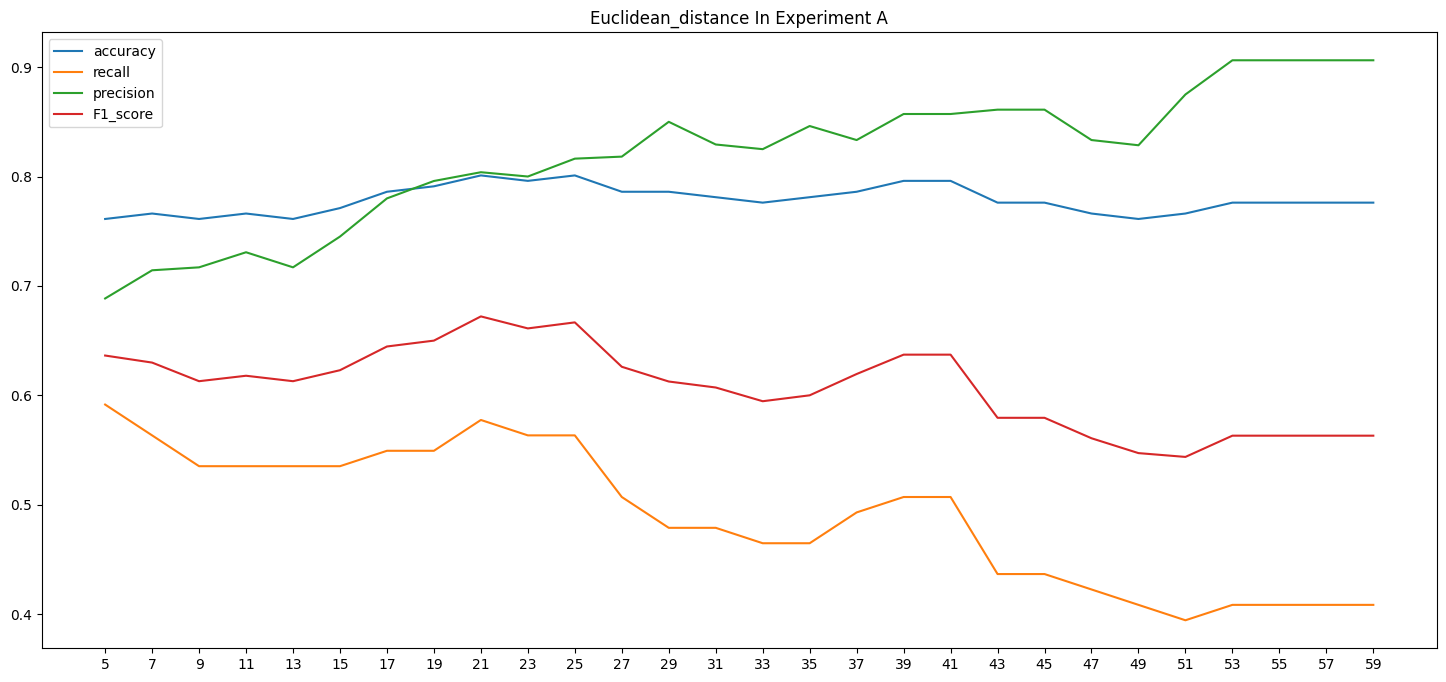

In [32]:
k = [i for i in range(5,60,2)]
ACC = []
REC = []
PREC = []
F1 = []
for i in k:
    KNN_model = KNN(i)
    KNN_model.fit(normalized_fp.values, fp['Outcome'].values)
    y_pred = KNN_model.predict(normalized_fn.values)
    ACC.append( KNN_model.accuracy(fn['Outcome'].values, y_pred) )
    REC.append( KNN_model.recall(fn['Outcome'].values, y_pred) )
    PREC.append( KNN_model.precision(fn['Outcome'].values, y_pred) )
    F1.append( KNN_model.F1_score(fn['Outcome'].values, y_pred) )
        
plt.figure(figsize=(18, 8))
plt.title("Euclidean_distance In Experiment A")
plt.xticks(np.arange(5, 60, 2)) # 改變x軸的步長為2
plt.plot(k,ACC, label = "accuracy")
plt.plot(k,REC , label = "recall")
plt.plot(k,PREC, label = "precision")
plt.plot(k,F1 , label = "F1_score")
plt.legend() #show line label
plt.show()

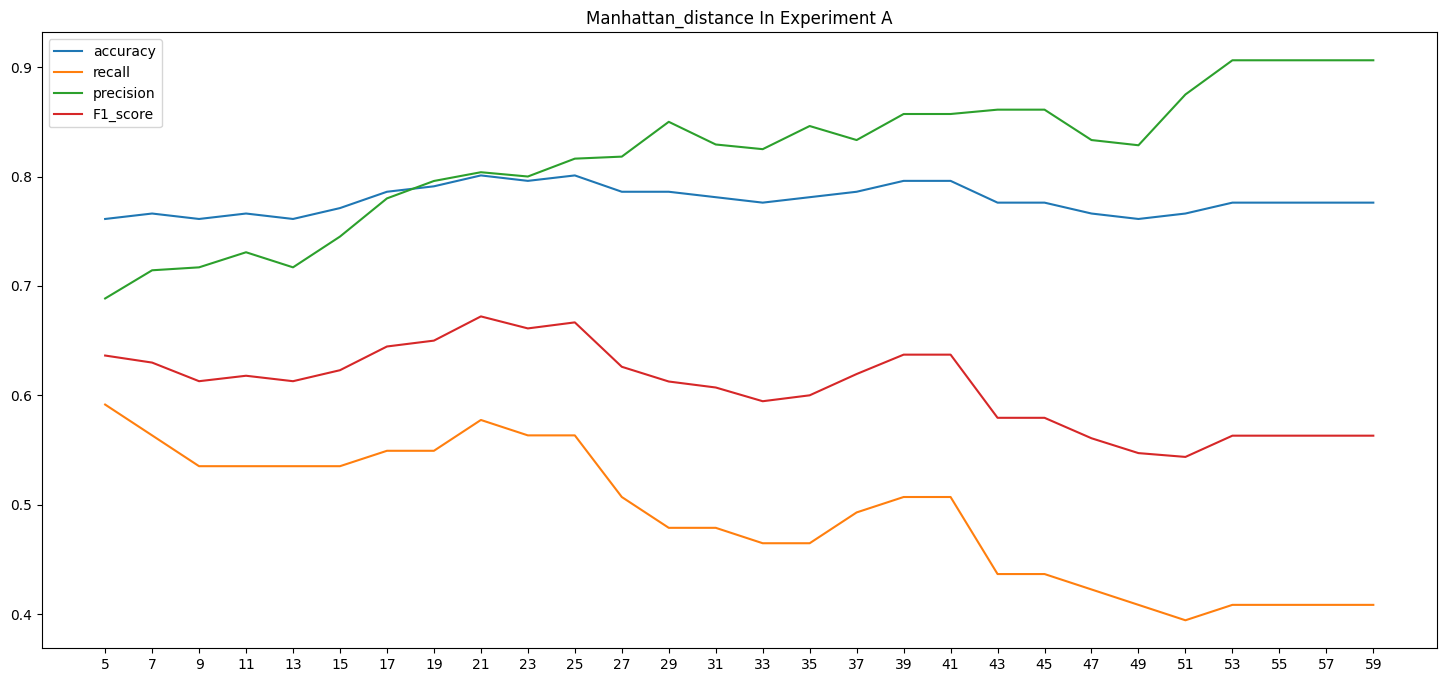

In [33]:
k = [i for i in range(5,60,2)]
ACC = []
REC = []
PREC = []
F1 = []
for i in k:
    KNN_model = KNN(i)
    KNN_model.fit(normalized_fp.values, fp['Outcome'].values)
    y_pred = KNN_model.predict(normalized_fn.values, 'manhattan')
    ACC.append( KNN_model.accuracy(fn['Outcome'].values, y_pred) )
    REC.append( KNN_model.recall(fn['Outcome'].values, y_pred) )
    PREC.append( KNN_model.precision(fn['Outcome'].values, y_pred) )
    F1.append( KNN_model.F1_score(fn['Outcome'].values, y_pred) )
        
plt.figure(figsize=(18, 8))
plt.title("Manhattan_distance In Experiment A")
plt.xticks(np.arange(5, 60, 2)) # 改變x軸的步長為2
plt.plot(k,ACC, label = "accuracy")
plt.plot(k,REC , label = "recall")
plt.plot(k,PREC, label = "precision")
plt.plot(k,F1 , label = "F1_score")
plt.legend() #show line label
plt.show()